# Data Cleaning & EDA

### Steps:

1. Read in various dataframes and append into 1 dataframe
2. Drop duplicated values
3. Handle missing values (missing text)
4. Handle links & short 'posts'
5. Countvectorize (text & title?- combine both or keep separate?) 
6. Examine trends (average word-count, sentiment analysis etc)
7. Store dataframe with new columns etc (how large will this be? Could that be a problem?)


In [39]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [40]:
u1 = pd.read_csv('data/Ultralight/ultralight.csv')
u2 = pd.read_csv('data/Ultralight/ultralight1.csv')
u3 = pd.read_csv('data/Ultralight/ultralight2.csv')
u4 = pd.read_csv('data/Ultralight/ultralight3.csv')
u5 = pd.read_csv('data/Ultralight/ultralight4.csv')


In [41]:
datasets = [u1, u2, u3, u4, u5]
ultralight = pd.concat(datasets)

In [42]:
ultralight.shape

(9445, 5)

In [43]:
ultralight.nunique()

Unnamed: 0     3974
created_utc    2001
title          1996
self_text      2584
subreddit         1
dtype: int64

In [44]:
ultralight.duplicated().sum()

7

In [45]:
ultralight.drop_duplicates(inplace=True)

In [46]:
ultralight.shape

(9438, 5)

In [47]:
c1 = pd.read_csv('data/Camping/camping.csv')
c2 = pd.read_csv('data/Camping/camping1.csv')
c3 = pd.read_csv('data/Camping/camping2.csv')
c4 = pd.read_csv('data/Camping/camping3.csv')
c5 = pd.read_csv('data/Camping/camping4.csv')

In [48]:
cdatasets= [c1, c2, c3, c4]

In [49]:
camping = pd.concat(cdatasets)

In [50]:
camping.shape

(8609, 5)

In [51]:
camping.nunique()

Unnamed: 0     3832
created_utc    2862
title          2851
self_text      1610
subreddit         1
dtype: int64

In [52]:
camping.duplicated().sum()

1319

In [53]:
camping.drop_duplicates(inplace=True)

In [54]:
camping.shape

(7290, 5)

In [55]:
camping.duplicated().sum()

0

In [56]:
camping.isna().sum()

Unnamed: 0        0
created_utc       0
title             0
self_text      3285
subreddit         0
dtype: int64

In [57]:
ultralight.isna().sum()

Unnamed: 0       0
created_utc      0
title            0
self_text      459
subreddit        0
dtype: int64

In [58]:
combined = [camping, ultralight]
df = pd.concat(combined)

In [59]:
df.shape

(16728, 5)

In [60]:
df.head()

,Unnamed: 0,created_utc,title,self_text,subreddit
0,0,1.697508e+09,Sierras,NaN,camping
1,1,1.697501e+09,Car camping recommendations in the GA/NC/TN area?,Hi there! Looking for solid car camping recomm...,camping
2,2,1.697499e+09,"Oceano Dunes, CA",Annual trip with friends & family. Always an e...,camping
3,3,1.697498e+09,"Fort pickens, Fl",Picks from this past weekend. Would recommend ...,camping
4,4,1.697498e+09,Camping groups,"Are there camping groups out there, that someo...",camping


In [61]:
df.tail()

,Unnamed: 0,created_utc,title,self_text,subreddit
3969,3969,1.685748e+09,Shakedown For Hiking on the Snowbank Trail in ...,Current base weight: 12.58\n\nLocation/temp ra...,Ultralight
3970,3970,1.685742e+09,Custom Carbon Tent Poles,"Hey so, have a hexamid solo and am primarily a...",Ultralight
3971,3971,1.685721e+09,GDT shakedown,"I'll be hiking sections C, D, and E of the Gre...",Ultralight
3972,3972,1.685718e+09,[Trip Report] GSMNP overnight loop. Mt. Sterli...,I went out over Memorial Day weekend for a 22m...,Ultralight
3973,3973,1.685721e+09,Looking for advice for a summer quilt,"Hello there,\n\nto make it short i want to buy...",Ultralight


In [62]:
df.to_csv('data/combined_dataset.csv')

In [63]:
df.isna().sum()

Unnamed: 0        0
created_utc       0
title             0
self_text      3744
subreddit         0
dtype: int64

In [64]:
df.dtypes

Unnamed: 0       int64
created_utc    float64
title           object
self_text       object
subreddit       object
dtype: object

In [65]:
df['word_count'] = df['self_text'].apply(lambda x: len(str(x).split()))
count_greater_than_10 = len(df[df['word_count'] > 10])
count_greater_than_10 = (df['word_count'] > 10).sum()
print("Number of rows with more than 10 words in 'self_text':", count_greater_than_10)

Number of rows with more than 10 words in 'self_text': 12702


In [73]:
df['word_count_title'] = df['title'].apply(lambda x: len(str(x).split()))

In [74]:
df.head()

,Unnamed: 0,created_utc,title,self_text,subreddit,word_count,sentiment,vader_score,word_count_title
0,0,1.697508e+09,Sierras,,camping,1,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,1
1,1,1.697501e+09,Car camping recommendations in the GA/NC/TN area?,Hi there! Looking for solid car camping recomm...,camping,30,"{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'comp...",0.2244,7
2,2,1.697499e+09,"Oceano Dunes, CA",Annual trip with friends & family. Always an e...,camping,10,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",0.4767,3
3,3,1.697498e+09,"Fort pickens, Fl",Picks from this past weekend. Would recommend ...,camping,10,"{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'comp...",0.7096,3
4,4,1.697498e+09,Camping groups,"Are there camping groups out there, that someo...",camping,276,"{'neg': 0.07, 'neu': 0.855, 'pos': 0.075, 'com...",0.3604,2


In [67]:

# Instantiate Sentiment Intensity Analyzer
sa = SentimentIntensityAnalyzer()

df['self_text'].fillna('', inplace=True)

# Apply sentiment analysis to each row in the DataFrame
df['sentiment'] = df['self_text'].apply(lambda x: sa.polarity_scores(x))


(16728, 9)

In [69]:
df['vader_score'] = df['self_text'].apply(lambda x: sa.polarity_scores(x)['compound'])

In [70]:
df.head()

,Unnamed: 0,created_utc,title,self_text,subreddit,word_count,sentiment,vader_score
0,0,1.697508e+09,Sierras,,camping,1,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000
1,1,1.697501e+09,Car camping recommendations in the GA/NC/TN area?,Hi there! Looking for solid car camping recomm...,camping,30,"{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'comp...",0.2244
2,2,1.697499e+09,"Oceano Dunes, CA",Annual trip with friends & family. Always an e...,camping,10,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",0.4767
3,3,1.697498e+09,"Fort pickens, Fl",Picks from this past weekend. Would recommend ...,camping,10,"{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'comp...",0.7096
4,4,1.697498e+09,Camping groups,"Are there camping groups out there, that someo...",camping,276,"{'neg': 0.07, 'neu': 0.855, 'pos': 0.075, 'com...",0.3604


In [75]:
df.groupby('subreddit')['word_count', 'vader_score', 'word_count_title'].mean()

C:\Users\kaitl\AppData\Local\Temp\ipykernel_19352\3777903337.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('subreddit')['word_count', 'vader_score', 'word_count_title'].mean()


,word_count,vader_score,word_count_title
subreddit,,,
Ultralight,266.267006,0.594296,8.296673
camping,49.048697,0.260431,9.100137


### Data Observations

1. Posts in the Ultralight subreddit are more positive on average than posts in the camping subreddit 
2. Posts in the Ultralight subreddit are longer than posts in the camping subreddit


#### Implication for Machine Learning:

1. The model will be trained on a larger quantity of 'ultralight' vs 'camping' language which could lead to bias
2. The culture of the subreddits may be different and not indicative of the larger populations- everyone who is an ultralight backpacker and everyone who camps. The significant difference in sentiment can be due to differences in moderation between the subreddits, rules for posting etc. 

In [85]:
#Binarize Subreddit column with ultralight = 1 and camping = 0
df['subreddit'] = df['subreddit'].replace({'Ultralight': 1, 'camping': 0})
df.subreddit.value_counts()

1    9438
0    7290
Name: subreddit, dtype: int64

In [107]:
ultra = df[df['subreddit']==1]

In [108]:
# Using a CountVectorizer for EDA

X = ultra['self_text']
y = ultra['subreddit']

cvec = CountVectorizer(stop_words='english')
X = cvec.fit_transform(X)
X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [99]:
cvec.get_feature_names_out()

array(['00', '000', '0001', ..., 'östgötaleden', 'оnе', 'расk'],
      dtype=object)

In [102]:
X_df = pd.DataFrame(X.todense(), columns = cvec.get_feature_names_out())

In [93]:
X_df.shape

(12546, 28424)

<Axes: >

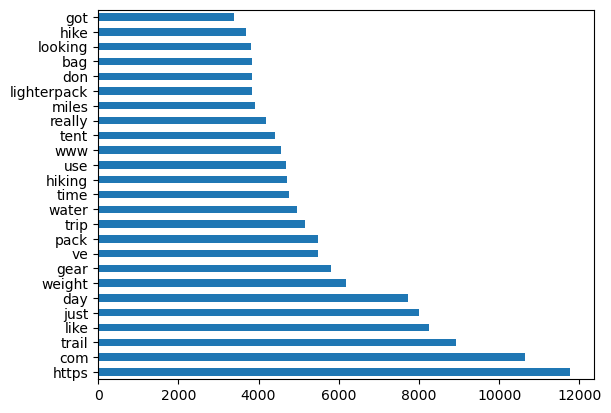

In [103]:
# plot top 25 words for each subreddit
X_df.sum().sort_values(ascending=False).head(25).plot(kind='barh')

In [ ]:
# Do I need to remove statuses with links? Or can I just remove the links from the statuses?
# Would there be any benefit from leaving them in?

In [113]:
camp=df[df['subreddit']==0]

In [115]:
#Do I want to add pre-processing to my count-vectorizer such as lemmatizer or tokenizer?

X = camp['self_text']
y = camp['subreddit']

cvec = CountVectorizer(stop_words='english')
X = cvec.fit_transform(X)
X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [116]:
X_df = pd.DataFrame(X.todense(), columns = cvec.get_feature_names_out())

<Axes: >

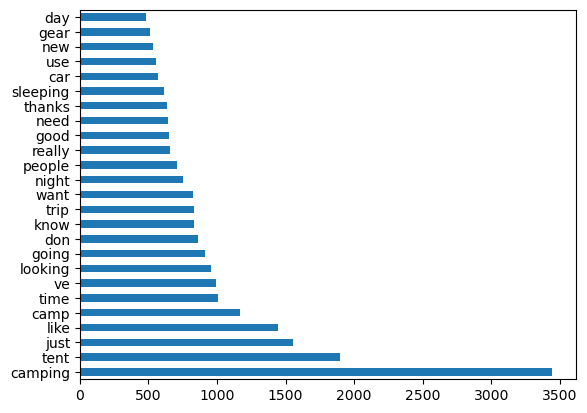

In [117]:
# plot top 25 words for each subreddit
X_df.sum().sort_values(ascending=False).head(25).plot(kind='barh')

When examining the top 25 words from each subreddit, as expected there is some overlap between the two. Words such as tent, day, gear, trip, and time appear frequently in posts in both subreddits. Some of the biggest differences seem to be the frequency of words such as camp and camping vs hike and hiking. I expect that while there will be considerable overlap (in that most words used in one subreddit will also be used in the other) the frequencies of some words will vary greatly. 